# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from IPython.core.display import display, HTML
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mahlesah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="Bitcoin AND bitcoin AND BTC", language="en", page_size=100, sort_by="relevancy"
)


print(f"Total number of news articles featuring Bitcoin - {bitcoin_articles['totalResults']}")
print(f"Sample news article featuring Bitcoin - {bitcoin_articles['articles'][1:3]}") 

Total number of news articles featuring Bitcoin - 2962
Sample news article featuring Bitcoin - [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'insider@insider.com (Simon Chandler,Paul Kim)', 'title': "What is bitcoin? A beginner's guide to the world's most popular type of cryptocurrency, and tips for investing in it", 'description': 'Bitcoin (BTC) is a digital currency that uses peer-to-peer technology to facilitate instant payments.', 'url': 'https://www.businessinsider.com/personal-finance/what-is-bitcoin', 'urlToImage': 'https://i.insider.com/5fd26a4630f2740018b0f223?width=1200&format=jpeg', 'publishedAt': '2022-05-20T21:00:42Z', 'content': 'Scarcely a news cycle goes by without some mention of bitcoin. As the first and most widely traded cryptocurrency, bitcoin is often seen as a representation of the larger cryptocurrency ecosystem, fo… [+13892 chars]'}, {'source': {'id': None, 'name': 'Bitcoin.com'}, 'author': None, 'title': 'Bitcoin, Ethereum Techn

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="Ethereum AND ethereum AND ETH", language='en', page_size=100, sort_by="relevancy"
)


print(f"Total number of news articles featuring Ethereum - {ethereum_articles['totalResults']}")
print(f"Sample news article featuring Ethereum - {ethereum_articles['articles'][1:3]}")   

Total number of news articles featuring Ethereum - 1471
Sample news article featuring Ethereum - [{'source': {'id': None, 'name': 'Gizmodo.com'}, 'author': 'Kyle Barr', 'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool', 'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…', 'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386', 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg', 'publishedAt': '2022-05-23T21:35:00Z', 'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take u

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        title = article["title"]
        text = article["content"].lower()       
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Title":title, "Text":text,
            "Date":date,  "Compound":compound,
            "Positive":pos,   "Negative":neg,
            "Neutral":neu,
            
        })
        
    except AttributeError:
        pass
    

df_bitcoin_sentiments = pd.DataFrame(bitcoin_sentiments)
df_bitcoin_sentiments.head()    

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,Miami’s Bitcoin Conference Left a Trail of Har...,"now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964
1,What is bitcoin? A beginner's guide to the wor...,scarcely a news cycle goes by without some men...,2022-05-20,0.0000,0.000,0.000,1.000
2,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859
3,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757
4,Protecting Retirement Savings from Volatile Cr...,did you hear? you may be able to allocate some...,2022-05-09,0.1280,0.045,0.000,0.955


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments  = []

for article in ethereum_articles["articles"]:
    try:
        title = article["title"]
        text = article["content"].lower()
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Title": title,
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
    
df_ethereum_sentiments = pd.DataFrame(ethereum_sentiments)
df_ethereum_sentiments.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,It’s Time To Get Interested In Ethereum Again,"crypto winter it may be, but ethereum looks li...",2022-06-09,0.3612,0.081,0.044,0.875
1,GameStop Dunks Its Head Into the Crypto Kiddie...,gamestop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960
2,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859
3,50 cryptocurrency and NFT terms you need to know,"if you're inexperienced with nfts, some terms ...",2022-05-20,0.5574,0.135,0.039,0.827
4,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757


In [8]:
# Describe the Bitcoin Sentiment
df_bitcoin_sentiments.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.060163,0.071580,0.055230,0.87320
std,0.476574,0.071333,0.065856,0.07974
min,-0.851900,0.000000,0.000000,0.60400
25%,-0.323650,0.000000,0.000000,0.82775
50%,0.064400,0.062000,0.047000,0.87900
75%,0.458800,0.115000,0.085000,0.93250
max,0.900100,0.349000,0.246000,1.00000


In [9]:
# Describe the Ethereum Sentiment
df_ethereum_sentiments.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.106411,0.07554,0.050370,0.874100
std,0.440135,0.07038,0.060817,0.086477
min,-0.851900,0.00000,0.000000,0.604000
25%,-0.273200,0.00000,0.000000,0.817000
50%,0.055900,0.07000,0.042000,0.879500
75%,0.481000,0.12050,0.079250,0.937000
max,0.900100,0.34900,0.260000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.07799

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.893400

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.33200

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_cuts = {'say', 'sent', 'go', 'wa', 'k', 'u', 'week', 'x', 'also', 'char','ha', 'th', 'b'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    word_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    output = [word.lower() for word in word_lower if word.lower() not in sw]
    output1 = [word.lower() for word in output if word.lower() not in sw_cuts]

    return output1

In [13]:
# Create a new tokens column for Bitcoin
df_bitcoin_tokens = df_bitcoin_sentiments.copy()
tokenized = []

for article in df_bitcoin_sentiments['Text']:
    tokenized_articles = tokenizer(article)
    tokenized.append({'tokens':tokenized_articles})

    
df_bitcoin_tokens['Tokens'] = pd.DataFrame(tokenized)
df_bitcoin_tokens.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,What is bitcoin? A beginner's guide to the wor...,scarcely a news cycle goes by without some men...,2022-05-20,0.0000,0.000,0.000,1.000,"[scarcely, news, cycle, without, mention, bitc..."
2,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."
3,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757,"[contagion, spreading, stock, market, investor..."
4,Protecting Retirement Savings from Volatile Cr...,did you hear? you may be able to allocate some...,2022-05-09,0.1280,0.045,0.000,0.955,"[hear, may, able, allocate, retirement, saving..."


In [35]:
# Create a new tokens column for Ethereum
df_ethereum_tokens = df_ethereum_sentiments.copy()
tokenized = []

for article in df_ethereum_sentiments['Text']:
    tokenized_articles = tokenizer(article)
    tokenized.append({'tokens':tokenized_articles})

    
df_ethereum_tokens['Tokens'] = pd.DataFrame(tokenized)
df_ethereum_tokens.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,It’s Time To Get Interested In Ethereum Again,"crypto winter it may be, but ethereum looks li...",2022-06-09,0.3612,0.081,0.044,0.875,"[crypto, winter, may, ethereum, look, like, bu..."
1,GameStop Dunks Its Head Into the Crypto Kiddie...,gamestop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960,"[gamestop, officially, thrown, headlong, web, ..."
2,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.076,0.066,0.859,"[btc, fell, lowest, level, since, last, july, ..."
3,50 cryptocurrency and NFT terms you need to know,"if you're inexperienced with nfts, some terms ...",2022-05-20,0.5574,0.135,0.039,0.827,"[youre, inexperienced, nfts, term, may, confus..."
4,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.070,0.173,0.757,"[contagion, spreading, stock, market, investor..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [36]:
from collections import Counter
from nltk import ngrams

In [37]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in df_bitcoin_tokens["Tokens"]]
bitcoin_bigrams[1]

Counter({('scarcely', 'news'): 1,
         ('news', 'cycle'): 1,
         ('cycle', 'without'): 1,
         ('without', 'mention'): 1,
         ('mention', 'bitcoin'): 1,
         ('bitcoin', 'first'): 1,
         ('first', 'widely'): 1,
         ('widely', 'traded'): 1,
         ('traded', 'cryptocurrency'): 1,
         ('cryptocurrency', 'bitcoin'): 1,
         ('bitcoin', 'often'): 1,
         ('often', 'seen'): 1,
         ('seen', 'representation'): 1,
         ('representation', 'larger'): 1,
         ('larger', 'cryptocurrency'): 1,
         ('cryptocurrency', 'ecosystem'): 1,
         ('ecosystem', 'fo'): 1})

In [38]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in df_ethereum_tokens["Tokens"]]
ethereum_bigrams[1]

Counter({('gamestop', 'officially'): 1,
         ('officially', 'thrown'): 1,
         ('thrown', 'headlong'): 1,
         ('headlong', 'web'): 1,
         ('web', 'viper'): 1,
         ('viper', 'nest'): 1,
         ('nest', 'new'): 1,
         ('new', 'app'): 1,
         ('app', 'release'): 1,
         ('release', 'though'): 1,
         ('though', 'hard'): 1,
         ('hard', 'whether'): 1,
         ('whether', 'proposed'): 1,
         ('proposed', 'population'): 1,
         ('population', 'gamers'): 1,
         ('gamers', 'game'): 1,
         ('game', 'developer'): 1,
         ('developer', 'take'): 1})

In [39]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_all_tokens = []

for tokens in df_bitcoin_tokens["Tokens"]:
    bitcoin_all_tokens += tokens

bitcoin_top10_words = token_count(bitcoin_all_tokens, 10)
bitcoin_top10_words

[('bitcoin', 44),
 ('cryptocurrency', 33),
 ('crypto', 29),
 ('market', 29),
 ('price', 21),
 ('bitcoinbtc', 20),
 ('investor', 19),
 ('last', 15),
 ('stock', 15),
 ('btc', 14)]

In [41]:
# Use token_count to get the top 10 words for Ethereum
ethereum_all_tokens = []

for tokens in df_ethereum_tokens["Tokens"]:
    ethereum_all_tokens += tokens

ethereum_top10_words = token_count(ethereum_all_tokens, 10)
ethereum_top10_words

[('crypto', 39),
 ('market', 33),
 ('price', 23),
 ('cryptocurrency', 21),
 ('investor', 19),
 ('last', 17),
 ('ethereumeth', 15),
 ('token', 15),
 ('ethereum', 13),
 ('month', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

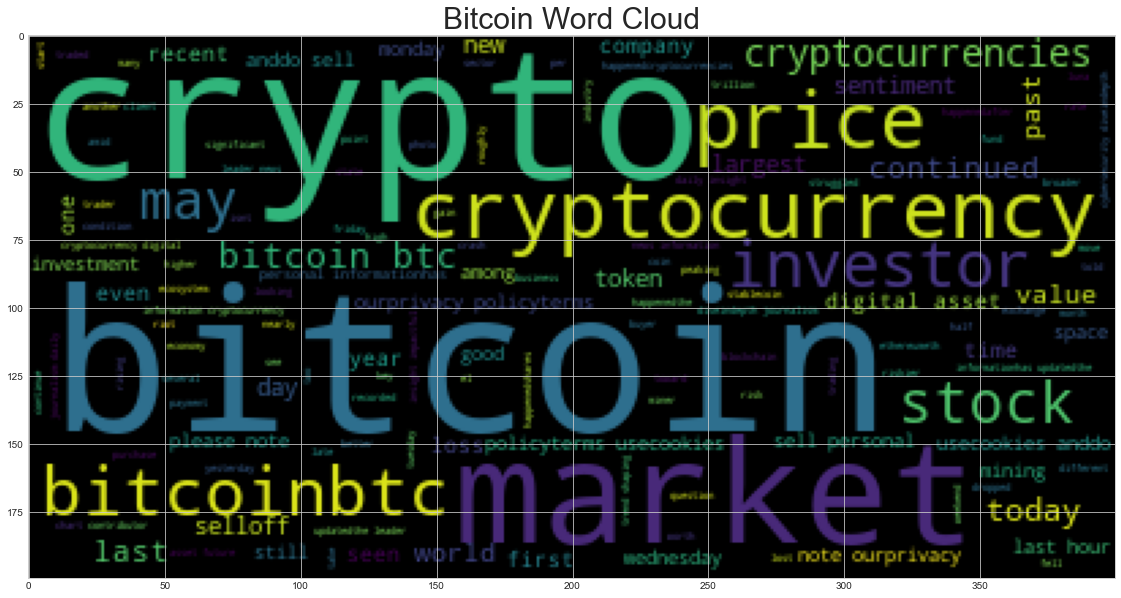

In [43]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoin_all_tokens)
bitcoin_word_cloud = WordCloud().generate(bitcoin_string)
plt.imshow(bitcoin_word_cloud)
plt.title("Bitcoin Word Cloud", fontsize=30)
plt.savefig('../Images/Bitcoin_Word_Cloud.png')
plt.show()

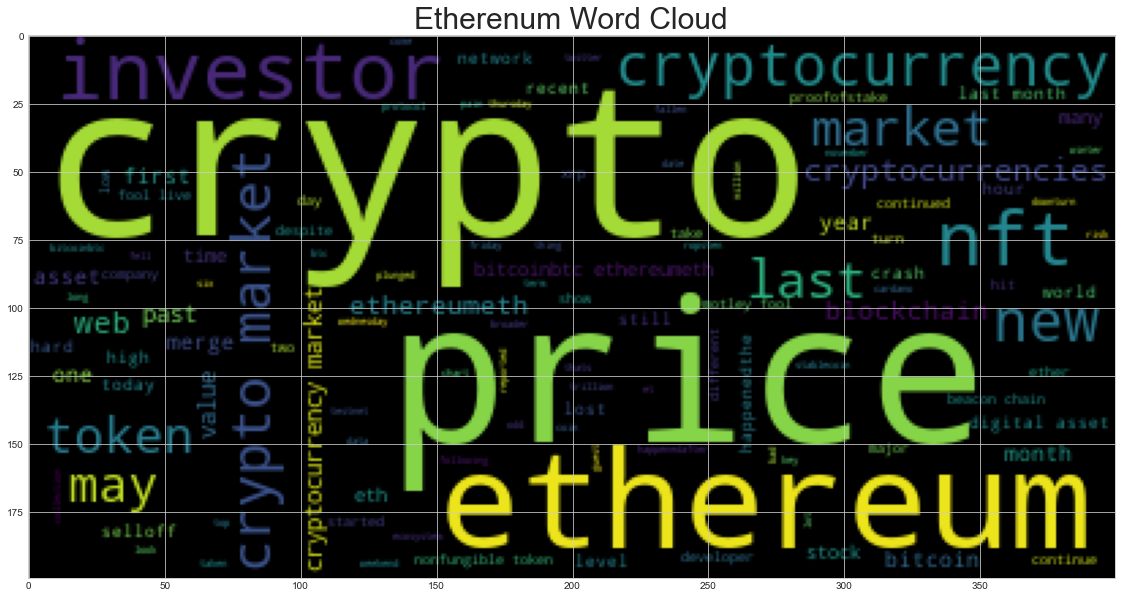

In [44]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_all_tokens)
ethereum_word_cloud = WordCloud().generate(ethereum_string)
plt.imshow(ethereum_word_cloud)
plt.title("Etherenum Word Cloud", fontsize=30)
plt.savefig('../Images/Etherenum_Word_Cloud.png')
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [46]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [48]:
# Concatenate all of the Bitcoin text together
bitcoin_text = []

for text in df_bitcoin_tokens['Text']:
    bitcoin_text.append(text)

bitcoin_all_text_string = ' '.join(bitcoin_text)

In [49]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all_text_string)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [50]:
# Render the visualization
bitcoin_html = displacy.render(bitcoin_ner, style='ent', jupyter=False)
output_path = Path("../images/Bitcoin_NER.html")
output_path.open("w", encoding="utf-8").write(bitcoin_html)
display(HTML(bitcoin_html))

In [51]:
# List all Entities
bitcoin_ents = set([ent.text for ent in bitcoin_ner.ents])
bitcoin_ents

{'$1.3 trillion',
 '+3115',
 '+4563',
 '-0.93%',
 '-1.64%',
 '-2.34%',
 '-2.76%',
 '-3.08%',
 '-3.10%',
 '-3.48%',
 '-3.71%',
 '-5.72%',
 '-5.78%',
 '-5.79%',
 '-5.94%',
 '-9.61%',
 '0.18%',
 '0.37%',
 '0.56%',
 '0.74%',
 '1,000',
 '1,200',
 '1.18%',
 '1.19%',
 '1.49%',
 '1.70%',
 '1.81%',
 '10,000',
 '100,000',
 '10:53 a.m.',
 '11:30 a.m.',
 '13 per cent',
 '2',
 '2 p.m. et',
 '2.11%',
 '2.18%',
 '20',
 '2013',
 '2015',
 '2017',
 '2021',
 '2022',
 '22 years old',
 '25.3%',
 '27,500',
 '3%',
 '3.2%',
 '3.3',
 '3.5%',
 '30',
 '30,000',
 '30,654',
 '33,000',
 '35,000',
 '4.13%',
 '4.67%',
 '4.81%',
 '400',
 '41%',
 '5.16%',
 '5.97%',
 '500',
 '56%',
 '6',
 '7',
 '8.00',
 '96%',
 '9:45',
 'a week',
 'about $60,000',
 'about 50%',
 'american',
 'android',
 "ark invest's",
 'around $29,880',
 'as much as 3.5%',
 'austin',
 'australia',
 'berlin',
 'bitcoin(btc -0.34%',
 'bitcoin(btc -3.66%',
 'bitcoin(btc -9.70%',
 'chinese',
 'close to $3 trillion',
 'close to $69,000',
 'cnbc',
 'coin\r\n

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = []

for text in df_ethereum_tokens['Text']:
    ethereum_text.append(text)

ethereum_all_text_string = ' '.join(ethereum_text)

In [32]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all_text_string)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
ethereum_html = displacy.render(ethereum_ner, style='ent', jupyter=False)
output_path = Path("../images/Ethereum_NER.html")
output_path.open("w", encoding="utf-8").write(ethereum_html)
display(HTML(ethereum_html))

In [34]:
# List all Entities
ethereum_ents = set([ent.text for ent in ethereum_ner.ents])
ethereum_ents

---